# 1. Introduction

In this notebook, I will go through my attempt at the Kaggle Titanic survival prediction competition. The aim of this competition is simple, given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we want to train a machine learning model to learn the relationship between passenger features and their survival outcome and subsequently make survival predictions on passenger data that our model has not seen before.

Kaggle competitions comprise of a minimum of 3 datasets that you can find and download from the competition webpage. The three datasets are:

Training set

Test set

Sample submission

# 2. Import libraries and read data

The three datasets used include the training data, test data and submission file.

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Model evaluation
from sklearn.model_selection import cross_val_score


train = pd.read_csv(r"C:\Users\Lyle\Desktop\Google Project\Titantic File\titanic\train.csv")
test= pd.read_csv(r"C:\Users\Lyle\Desktop\Google Project\Titantic File\titanic\test.csv")
ss= pd.read_csv(r"C:\Users\Lyle\Desktop\Google Project\Titantic File\titanic\gender_submission.csv")


#Will then have a look at the dataset
train.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


There appears to be 12 columns in the dataset.

In [2]:
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [3]:
ss.head(4)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0


In [4]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)
print("Submission set shape: ", ss.shape)


Training set shape:  (891, 12)
Test set shape:  (418, 11)
Submission set shape:  (418, 2)


The training set has one less column than the test set, the missing column in the test set is the "Survived" column. The submission set has the smame number of rows as the  test set.

# 3. Exploratory Data Analysis (EDA)



# 3.1. Data types, missing data and summary statistics

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There appears to be a large number of missing values for "Age" and "Cabin". With only two missing values for "Embarked". The datatypes include 5 integers, 2 floats and 5 objects.

In [6]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There results are only for datatypes of int64 and float64. Object datatypes aren't shown.

# 3.2. Feature Analysis

In our dataset, rows are the passengers on the titanic whereas columns are the features or variables that describe the passengers like their age, gender. Some of the features are very relevant for predicting the "Survived" column, while some are not relevant. For our dataset, the Passenger Id, Ticket number are likely not that revevant. Further analysis is required to be sure of this.

While the other explanatory variables are almost certainly relevant, understanding their types is useful. An example is knowing the difference of binary variables such as sex compared to a continuous variable such as age, this helps to structure our analysis.

# 3.2.1. Categorical variables

# 'Sex'

In [7]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

There are more males than females in the training set, however the likelihood of surviving differs to a large extent with females more likely to survive.

# 'Pclass'

In [9]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


While most passengers in the train dataset are in the third class, the likelihood of survival increases with the higher classes.

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

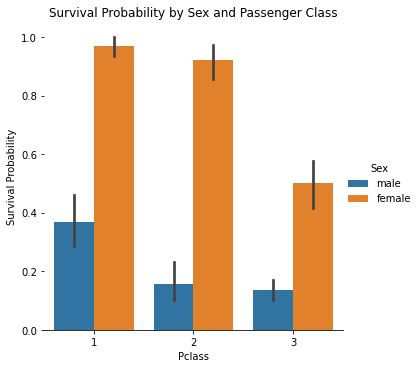

In [11]:
# Survival by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

Females are more likely to survive for every passenger class.

# 'Embarked'

In [12]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [13]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


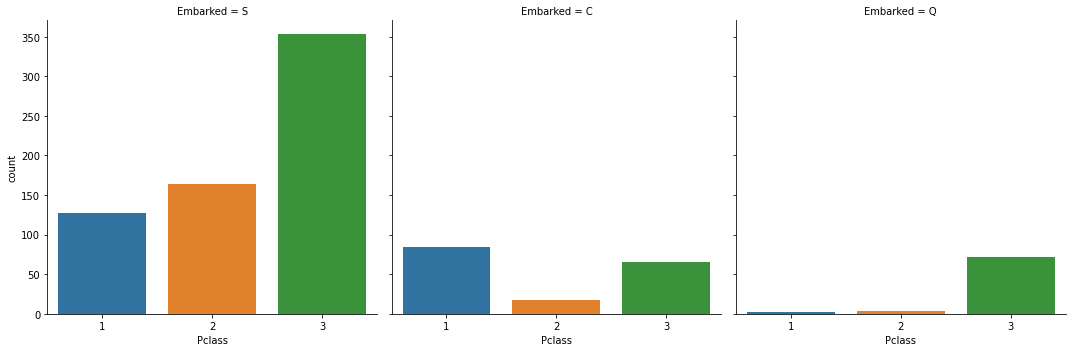

In [14]:
# Survival probability by class and embarked
sns.catplot(x='Pclass', col = 'Embarked', data = train, kind = 'count')



C:\Users\Lyle\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lyle\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


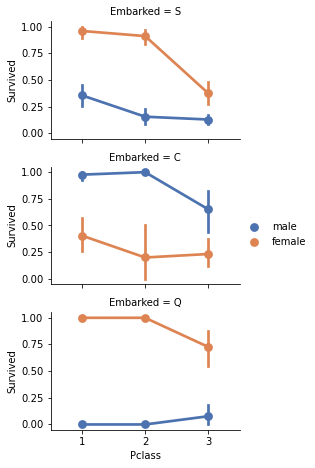

In [15]:
# Survival probability by gender and embarked

grid = sns.FacetGrid(train, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

# 3.2.2. Numerical Variables
Numerical variables in our dataset are SibSp, Parch, Age and Fare.


# Correlation Heatmap

<AxesSubplot:>

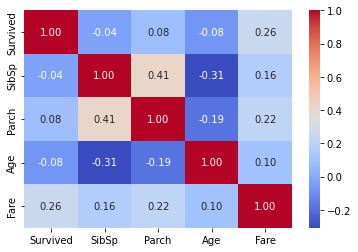

In [16]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

#Showing the correlation with 'Survived'

# 'SibSp'

In [17]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

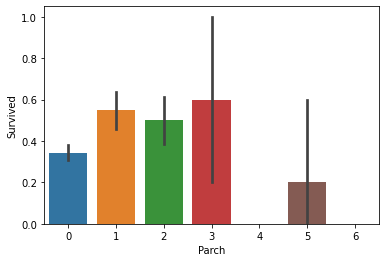

In [19]:
sns.barplot(x = 'Parch', y ='Survived', data = train)



# 'Age'

This is a continous variable, hence value counts will not be appropriate.

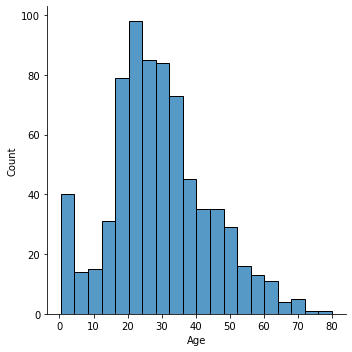

In [20]:
# Passenger age distribution

sns.displot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

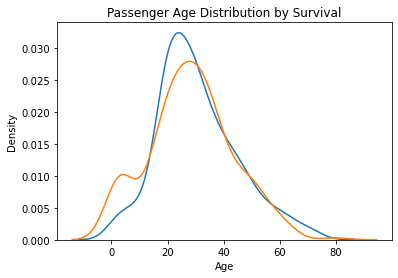

In [21]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

# 'Fare'

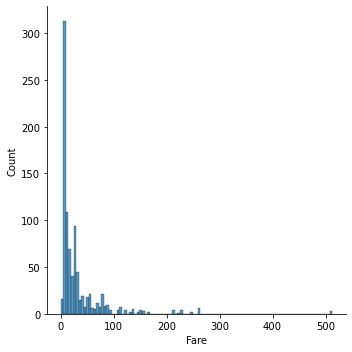

In [22]:
sns.displot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))

This variable has a very high level of skewness which needs to be adjusted.

# 4. Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. This includes filling in missing values, data transformation, feature engineering and feature encoding. 



# 4.1. Filling in Missing Values

In [23]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

'Ticket' feature as it likely contains no useful information. 'Cabin' feature also dropped as it has too many missing values.

In [24]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [25]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

Age has the most missing values of the remaining variables in the train and test data. The next step is to estimate values for the missing age values using features that are most correlated with Age.


# 4.2. Combine test and train datasets

In [26]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


Several of the qualitative variables need to be encoded to be analysed. The first feature to be encoded is the binary 'Sex' variable.


In [27]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
Embarked         2
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

The 418 'Survived' missing values are from the test dataset. Hence there are 263 values missing for 'Age' in both the train and test datasets.

In [28]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})
combine.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S


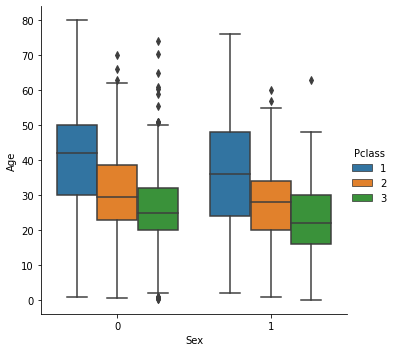

In [29]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)

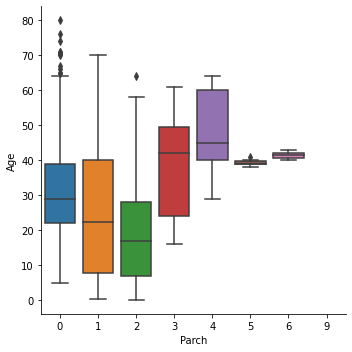

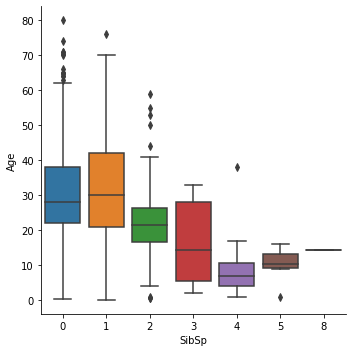

In [30]:
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

These box plots show that SibSp,Parch and Class can somewhat predict the Age. Sex is not as clear.

<AxesSubplot:>

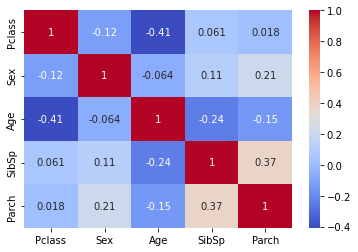

In [31]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')


'Sex' has the lowest correlation with 'Age'

In [32]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

263

In [33]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

C:\Users\Lyle\AppData\Local\Temp\ipykernel_11652\3297928322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['Age'].iloc[index] = predict_age
C:\Users\Lyle\AppData\Local\Temp\ipykernel_11652\3297928322.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine['Age'].iloc[index] = median_age


In [34]:
combine['Age'].isnull().sum()

0

In [35]:
combine.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S


The missing age values has been imputed using the siblings, parents and class variables.

# 4.3. Data transformation

Recall that the 'Fare' variable is highly skewed. Thus we will apply a log transformation to address this issue.

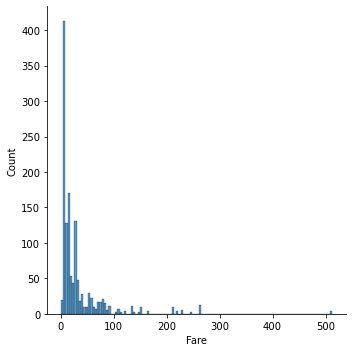

In [36]:
sns.displot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))


In [37]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

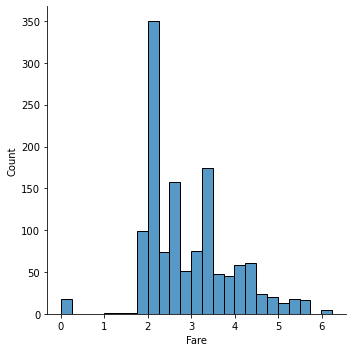

In [38]:
sns.displot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))


The "Fare' variable is now much more normally distributed.

# 4.4. Feature engineering
This section will create and transform multiple features to assist with data analysis.

In [39]:
combine.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


# 'Title'

The 'Name' variable might contain some useful information. To make use of the 'Name' variable, a categorical 'Title' variable is created.

In [40]:
# Split title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]


In [41]:
combine.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S,Miss


In [42]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [43]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [44]:
combine['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [45]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


It is clear that this feature has some useful information on survival rates.

In [46]:
# Drop Name feature

combine = combine.drop('Name', axis = 1)

# 'FamilySize'

In [47]:
# Calculate family size from the sum of 'SibSp' and 'Parch' +1

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [48]:
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


The size of the family seems correlate with survived.

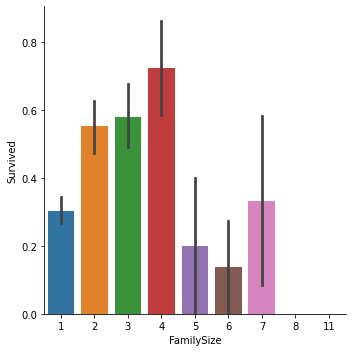

In [49]:
sns.catplot(x = 'FamilySize', y = 'Survived', data = combine, kind = 'bar')

In [50]:
#combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
#combine['Title'] = combine['Title'].replace('Mme', 'Mrs')
#combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col'], 'Rare')


In [51]:
combine['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [52]:
combine['FamilySize'] = combine['FamilySize'].replace([5,6,7,8,11], 5)

In [53]:
combine['FamilySize'].value_counts()

1    790
2    235
3    159
5     82
4     43
Name: FamilySize, dtype: int64

In [54]:
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538
4,5,0.161290


# 'Age'

To make use of the continuous 'Age' variable, we will group 'Age' into 5 separate age bands and assign a number to each age band onto 'Age'.

In [55]:

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')


,AgeBand,Survived
0,"(0.0902, 16.136]",0.500000
1,"(16.136, 32.102]",0.341719
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


The trend is decreased likelihood of survival with increased age.

In [56]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [57]:
combine.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,AgeBand
0,1,0.0,3,0,1.0,1,0,1.981001,S,Mr,2,"(16.136, 32.102]"
1,2,1.0,1,1,2.0,1,0,4.266662,C,Mrs,2,"(32.102, 48.068]"
2,3,1.0,3,1,1.0,0,0,2.070022,S,Miss,1,"(16.136, 32.102]"


In [58]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [59]:
combine['Age'].value_counts()

1.0    727
2.0    308
0.0    155
3.0    106
4.0     13
Name: Age, dtype: int64

In [60]:
combine['Age'] = combine['Age'].astype('int')

# 4.5. Feature encoding
The next step is to encode all non-numeric variables into numeric so that they can be analysed.

# 'Title' 'Embarked' encoding

In [61]:
combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,1.981001,2,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,4.266662,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,2.070022,1,0,1,0,0,0,0,0,1


In [62]:
combine.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,1.981001,2,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,4.266662,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,2.070022,1,0,1,0,0,0,0,0,1


# 'Fare' encoding

In [63]:
# Divide 'Fare' into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.504983
3,"(4.679, 6.239]",0.745098


The trend is increased likelihood of survival with higher fare.

In [64]:
# Assign ordinal to each fare band
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [65]:
# Convert Fare into integer
combine['Fare'] = combine['Fare'].astype('int')

In [66]:
# Drop FareBand feature
combine = combine.drop('FareBand', axis = 1)

In [67]:
combine.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,1,2,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,2,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,1,1,0,1,0,0,0,0,0,1


# 4.6. Split Data
The next step is to split the 'combine' dataset into 'train' and 'test' data

In [68]:
train = combine[:len(train)]
test = combine[len(train):]

In [69]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,1,2,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,2,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,1,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,1,0,2,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,0,1,1,0,0,1,0,0,0,0,1


In [70]:
# Drop passenger ID column from and training set
train = train.drop('PassengerId', axis = 1)

In [71]:
# Convert 'Survived' to integer
train['Survived'] = train['Survived'].astype('int')

In [72]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,1,2,0,0,1,0,0,0,0,1
1,1,1,1,2,1,0,2,2,0,0,0,1,0,1,0,0
2,1,3,1,1,0,0,1,1,0,1,0,0,0,0,0,1


In [73]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,0,0,1,1,0,0,1,0,0,0,1,0
892,893,NaN,3,1,2,1,0,1,2,0,0,0,1,0,0,0,1
893,894,NaN,2,0,3,0,0,1,1,0,0,1,0,0,0,1,0
894,895,NaN,3,0,1,0,0,1,1,0,0,1,0,0,0,0,1
895,896,NaN,3,1,1,1,1,1,3,0,0,0,1,0,0,0,1


In [74]:
test_ids=test["PassengerId"]

In [123]:
test = test.drop('PassengerId', axis = 1)
#Not completely sure about this.

In [76]:
test = test.drop('Survived', axis = 1)

In [77]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,3,0,2,0,0,1,1,0,0,1,0,0,0,1,0
892,893,3,1,2,1,0,1,2,0,0,0,1,0,0,0,1
893,894,2,0,3,0,0,1,1,0,0,1,0,0,0,1,0
894,895,3,0,1,0,0,1,1,0,0,1,0,0,0,0,1
895,896,3,1,1,1,1,1,3,0,0,0,1,0,0,0,1


The datasets are now ready for modelling.

# 5. Modelling

Since Titanic is a classfication problem, we will need to use classfication models using Scikit-learn to train on our model to make predictions

# 5.1. Split training data

We need to first split our training data into independent variables  represented by X and the dependent variable  represented by Y. Y_train is the 'Survived' feature in our training set and X_train is the other columns in the training set excluding the 'Survived' feature. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [78]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 15)
Y_train shape:  (891,)
X_test shape:  (418, 15)


In [79]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,3,0,2,0,0,1,1,0,0,1,0,0,0,1,0
892,3,1,2,1,0,1,2,0,0,0,1,0,0,0,1
893,2,0,3,0,0,1,1,0,0,1,0,0,0,1,0
894,3,0,1,0,0,1,1,0,0,1,0,0,0,0,1
895,3,1,1,1,1,1,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,0,0,1,1,0,0,1,0,0,0,0,1
1305,1,1,2,0,0,3,1,0,0,0,0,1,1,0,0
1306,3,0,2,0,0,1,1,0,0,1,0,0,0,0,1
1307,3,0,1,0,0,1,1,0,0,1,0,0,0,0,1


# 5.2. Fitting Models 
Multiple model types will be fitted and their accuracy measured.

# 5.2.1. Logistic regression

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
logreg.score(X_train, Y_train)
#Y_pred_log for kaggle is only 0.75598  


0.8305274971941639

# 5.2.2. Support Vector Machines  (SVM)

In [81]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svm = svc.predict(X_test)
svc.score(X_train, Y_train) 
#Y_pred_svm for kaggle is only 0.77511, this is the highest so far



0.835016835016835

# 5.2.3. K-nearest neighbours (KNN)

In [82]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
knn.score(X_train, Y_train) 
#Y_pred_knn for kaggle is only 0.76315


0.8473625140291807

# 5.2.4. Gaussian Naive Bayes

In [83]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gau = gaussian.predict(X_test)
gaussian.score(X_train, Y_train)
#Y_pred_gau for kaggle Score: 0.75837.Very average.



0.8114478114478114

# 5.2.5. Perceptron

In [84]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred_per = perceptron.predict(X_test)
perceptron.score(X_train, Y_train)
#Y_pred_per for kaggle Score: 0.72727. This is by the worst.


0.7373737373737373

# 5.2.6. Linear SVC

In [85]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
linear_svc.score(X_train, Y_train) 

C:\Users\Lyle\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8305274971941639

# 5.2.7. Stochastic gradient descent

In [86]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)
sgd.score(X_train, Y_train) 
#Y_pred_sgd for kaggle is only 0.77033. This is decent.



0.8226711560044894

# 5.2.8. Decision tree

In [87]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train) 



0.877665544332211

# 5.2.9. Random forest

In [88]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train) 

#Y_pred_rf for kaggle is only 0.76076


0.877665544332211

# 6. Ensemble Modelling, Prediction and Submission
The results of each of the models will then be submitted to https://www.kaggle.com/competitions/titanic/overview.

In [89]:
#Repeat of log regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
logreg.score(X_train, Y_train)
#Y_pred_log for kaggle is only 0.75598 for my prediction 

0.8305274971941639

In [139]:
Y_pred_rf

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
#from sklearn.model_selection import train_test_split
#X_train, X_val,y_train,y_val= train_test_split(X_train,Y_train,test_size=0.2,random_state=50)


In [92]:
#clf= LogisticRegression(random_state=0,max_iter=1000).fit(X_train, Y_train)

In [93]:
#submission_preds=Y_pred_gau


In [94]:
#df=pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission_preds,})
#df.to_csv(r"C:\Users\Lyle\Desktop\Google Project\Titantic File\titanic\submission_gau.csv",index=False)

# 6.1.Ensemble models

In [98]:

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve



In [102]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

C:\Users\Lyle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


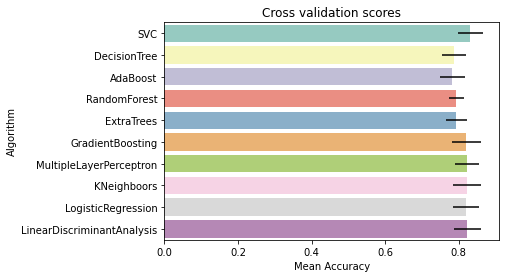

In [103]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# 6.2. Gradient Boosting

In [104]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [105]:
gsadaDTC.best_score_

0.7923970037453183

In [106]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.840649188514357

In [107]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8317228464419475

In [108]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8215480649188516

In [109]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8350187265917602

# 6.3. Plot Learning Curves
Done to see the overfitting effect on the training set and the effect of the training size on the accuracy.

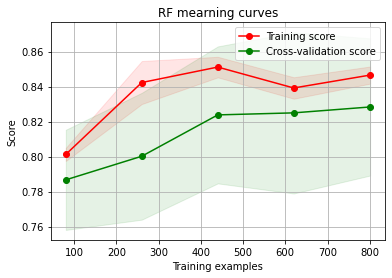

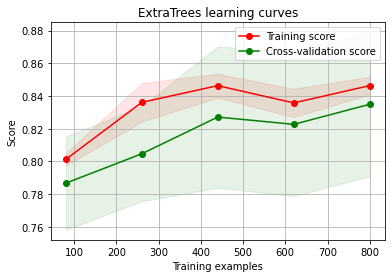

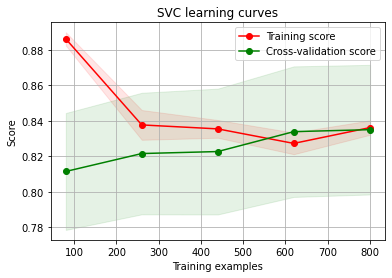

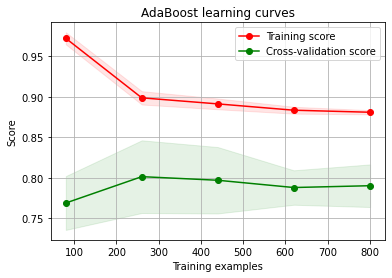

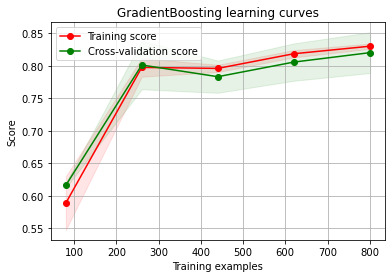

In [110]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

ExtraTrees classifiers and Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves ExtraTrees classifiers and Random Forest Classifier could perform better with more training examples.

SVC and GradientBoosting  seem to better generalize the prediction since the training and cross-validation curves are close together.

# 6.4. Feature Importance

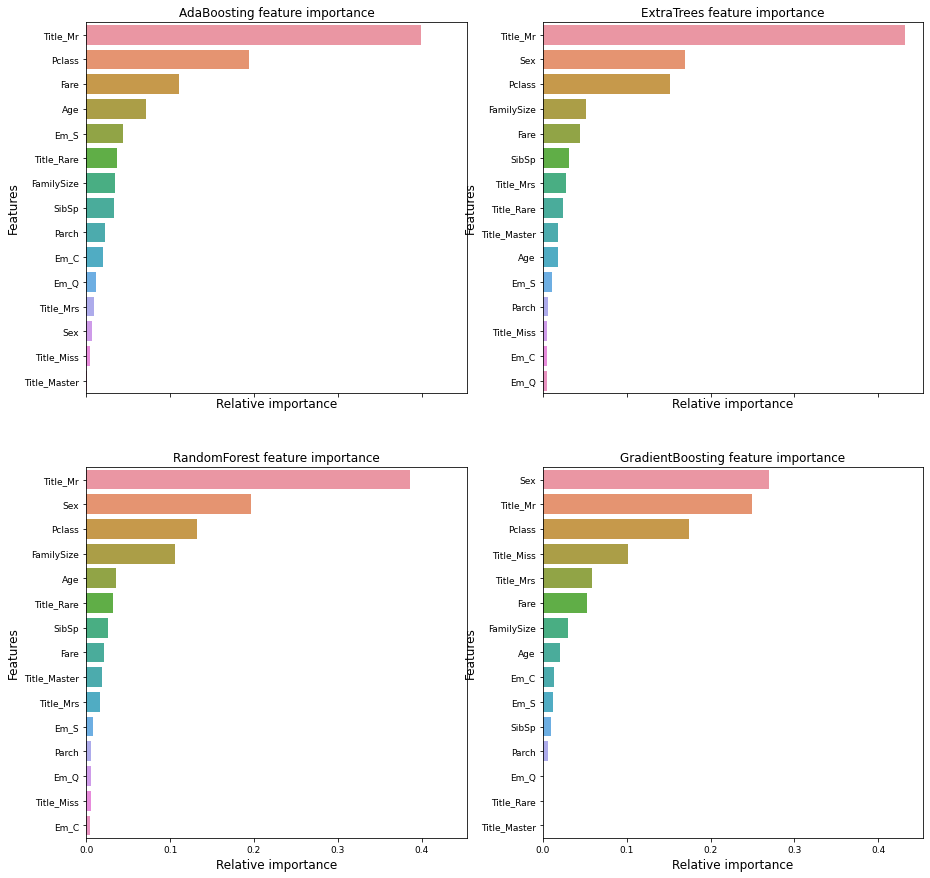

In [111]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

# 6.5. Ensemble Modelling and Prediction

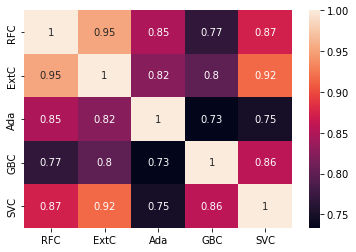

In [184]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

In [118]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

# Obtained kaggle results of 0.79186. My highest yet.

In [179]:
ID1test=ss["PassengerId"]

In [173]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")



0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int32

In [181]:

results = pd.concat([ID1test,test_Survived],axis=1)
#df=pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission_preds,})
#df.to_csv(r"C:\Users\Lyle\Desktop\Google Project\Titantic File\titanic\submission_gau.csv",index=False)

In [176]:
results=IDtest.to_frame().join(test_Survived.to_frame())

In [183]:
results.to_csv(r"C:\Users\Lyle\Desktop\Google Project\Titantic File\titanic\submission_ens4.csv",index=False)